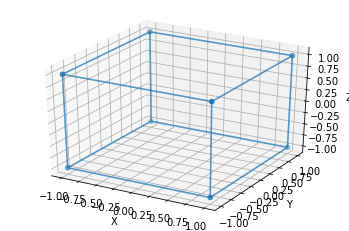

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
ax.plot_wireframe(X,Y,one, alpha=0.5)
ax.plot_wireframe(X,Y,-one, alpha=0.5)
ax.plot_wireframe(X,-one,Y, alpha=0.5)
ax.plot_wireframe(X,one,Y, alpha=0.5)
ax.plot_wireframe(one,X,Y, alpha=0.5)
ax.plot_wireframe(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [63]:

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
from numpy.random import seed
import random
from scipy.stats import pearsonr

# seed random number generator
seed(1)


L = random.randint(1,10) #random integer between 1 and 10 for length
W = random.randint(1,10) #randm integer between 1 and 10 for width
H = 2.40 #height (and length and width) in m
carpet = L * W #area of carpet needed
wallpaper = 2*(H*L) + 2*(H*W) #area of wallpaper needed

sigmaL = 0.01 #uncertainty in length
sigmaW= 0.01 #uncertainty in width
sigmaH=0.01 #uncertainty in height
sigmaCarpet = carpet * np.sqrt((sigmaL/L)**2 + (sigmaW/W)**2) #uncertainty in amount of carpet needed
sigmaHL = (H*L) * np.sqrt((sigmaH/H)**2 + (sigmaL/L)**2) #uncertainty in H*L
sigmaHW = (H*W) * np.sqrt((sigmaH/H)**2 + (sigmaW/W)**2) #uncertainty in H*W
sigmaWallpaper = np.sqrt((4 * sigmaHL**2) + (4* sigmaHW**2)) #uncertainty in wallpaper

                         

print('Lenght= %f +- %f, Width = %f +- %f, Height = %f +- %f'%(L,sigmaL, W, sigmaW, H, sigmaH))
print('Amount of carpet needed is %f m^2 +- %f' %(carpet, sigmaCarpet))
print('Amount of wallpaper needed is %f m^2 +- %f' %(wallpaper, sigmaWallpaper))



                         

    



#covariance = np.cov(L,W)
#print(covariance)
#PCC = covariance / (np.std(L) * np.std(W))
#print(PCC)
#corr = pearsonr(L,W)
#print('corr=', corr)

Lenght= 3.000000 +- 0.010000, Width = 5.000000 +- 0.010000, Height = 2.400000 +- 0.010000
Amount of carpet needed is 15.000000 m^2 +- 0.058310
Amount of wallpaper needed is 38.400000 m^2 +- 0.134937


In [206]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
from numpy.random import seed
import random
from scipy.stats import pearsonr

# seed random number generator
seed(np.random.randint(1,100))

n=10

L = np.random.randint(1,10,n) #random integer between 1 and 10 for length
W = np.random.randint(1,10,n) #randm integer between 1 and 10 for width
#L = np.array([6,9,6,1,1,2,8,7,3,5])
#W = np.array([6,3,5,3,5,8,8,2,8,1])
H = np.full((1,n), 2.40) #height (and length and width) in m. array of 2.40s [1][10]
carpet = L * W #area of carpet needed
wallpaper = 2*(H*L) + 2*(H*W) #area of wallpaper needed

#print(carpet)
#print(wallpaper)
#assuming uncertainties to be equal
sigmaL = 0.01 #uncertainty in length
sigmaW= 0.01 #uncertainty in width
sigmaH=0.01 #uncertainty in height

covLW = np.cov(L,W) #covariance between length and width
covHL = np.cov(H,L) #covariance between height and lenght
covHW = np.cov(H,W) #covariance between ehight and width

sigmaCarpet = carpet * np.sqrt((sigmaL/L)**2 + (sigmaW/W)**2 + (2*(abs(covLW[0][1]/(L*W))))) #uncertainty in amount of carpet needed
sigmaHL = (H*L) * np.sqrt((sigmaH/H)**2 + (sigmaL/L)**2 + (2*(abs(covHL[0][1]/(H*L))))) #uncertainty in H*L C in notes
sigmaHW = (H*W) * np.sqrt((sigmaH/H)**2 + (sigmaW/W)**2 + (2*(abs(covHW[0][1]/(H*W))))) #uncertainty in H*W D in notes

covCD = np.cov(H*L, H*W) #covariance between C and D or the height length and height width

sigmaWallpaper = np.sqrt((4 * sigmaHL**2) + (4* sigmaHW**2)+ (8*abs(covCD[0][1]))) #uncertainty in wallpaper

print(len)

print(len(sigmaHL))
print(len(sigmaHW))

print(len(sigmaWallpaper))
print(len(sigmaCarpet))

covCaWa= np.cov(sigmaCarpet, sigmaWallpaper)   #covariance between carpet and wallpaper uncertainties
corr2,_ = pearsonr(sigmaCarpet,sigmaWallpaper)

#np.std(L) #std dev for L
#np.std(W) #std dev for W

#calculating the covariance between the uncertainties in the carpet and wallpaper
sigmaC_s = sigmaCarpet**2
sigmaWa_s = sigmaWallpaper**2
sumsigmaC = np.sum(sigmaCarpet)
sumsigmaWa = np.sum(sigmaWallpaper)
sumC2 = np.sum(sigmaC_s)
sumWa2 = np.sum(sigmaWa_s)

covCW = n*(np.sum(sigmaCarpet*sigmaWallpaper))-(np.sum(sigmaCarpet)*(np.sum(sigmaWallpaper)))

rCW = covCW / (np.sqrt((n*sumC2 - sumsigmaC**2)*(n*sumWa2 - sumsigmaWa**2)))


L_s = L**2
W_s = W**2
sumL = np.sum(L)
sumW = np.sum(W)
sumL2 = np.sum(L_s)
sumW2 = np.sum(W_s)

cov = n*(np.sum(L*W))-(np.sum(L)*(np.sum(W)))

r = cov / (np.sqrt((n*sumL2 - sumL**2)*(n*sumW2 - sumW**2)))

corr2,_ = pearsonr(L,W)

                         
print(L)
print(W)
print(H)

1
1
1
10


ValueError: x and y must have the same length.

-0.33765580195575623
[7 7 1 8 8 2 7 2 4 7]
[-0.3376558 -0.3376558 -0.3376558 -0.3376558 -0.3376558 -0.3376558
 -0.3376558 -0.3376558 -0.3376558 -0.3376558]


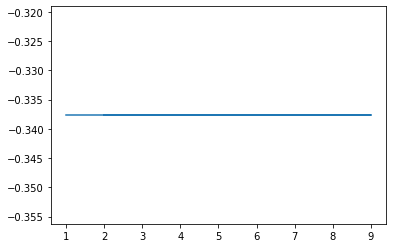

In [219]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
from numpy.random import seed
import random
from scipy.stats import pearsonr

# seed random number generator
seed(np.random.randint(1,100))

n=10

L = np.random.randint(1,10,n) #random integer between 1 and 10 for length
W = np.random.randint(1,10,n) #randm integer between 1 and 10 for width
#L = np.array([6,9,6,1,1,2,8,7,3,5])
#W = np.array([6,3,5,3,5,8,8,2,8,1])
H = 2.40 #height (and length and width) in m. array of 2.40s [1][10]
carpet = L * W #area of carpet needed
wallpaper = 2*(H*L) + 2*(H*W) #area of wallpaper needed

#print(carpet)
#print(wallpaper)
#assuming uncertainties to be equal
sigmaL = 0.01 #uncertainty in length
sigmaW= 0.01 #uncertainty in width
sigmaH=0.01 #uncertainty in height

covLW = np.cov(L,W) #covariance between length and width


sigmaCarpet = carpet * np.sqrt((sigmaL/L)**2 + (sigmaW/W)**2 + (2*(abs(covLW[0][1]/(L*W))))) #uncertainty in amount of carpet needed
sigmaHL = (H*L) * np.sqrt((sigmaH/H)**2 + (sigmaL/L)**2 + (2*(abs(covHL[0][1]/(H*L))))) #uncertainty in H*L C in notes
sigmaHW = (H*W) * np.sqrt((sigmaH/H)**2 + (sigmaW/W)**2 + (2*(abs(covHW[0][1]/(H*W))))) #uncertainty in H*W D in notes

r,_ = pearsonr(L,W)
print(r)
R = np.full((10), r)
print(W)
print(R)
plt.plot(L,R)